In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
import imutils
import imutils.perspective as persp
import scipy.spatial.distance as dist

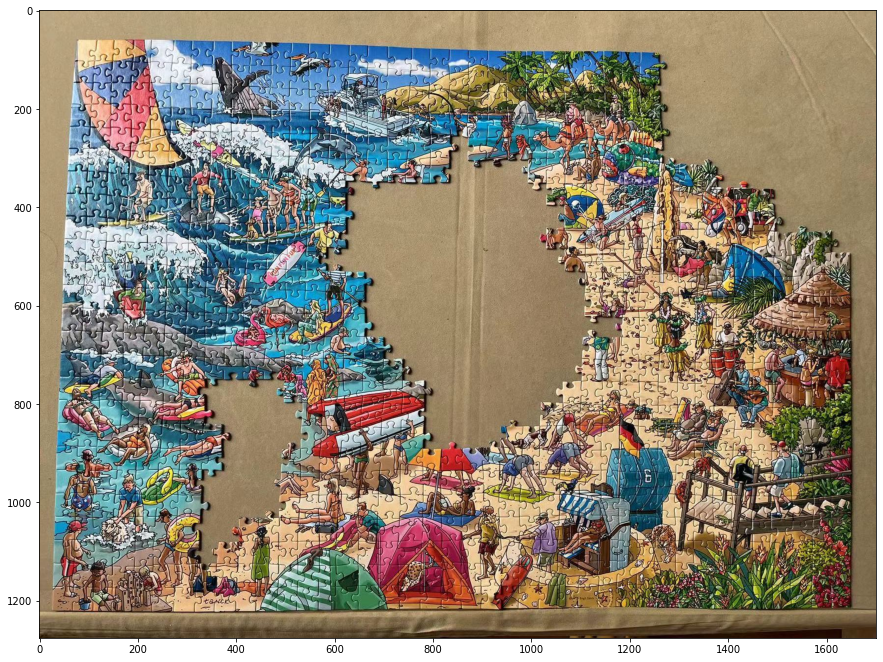

In [2]:
# load images
img_dir = r'data/'
img = cv2.imread(os.path.join(img_dir, '2.jpeg')) # read in B G R order

# convert to R G B
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show the image
plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

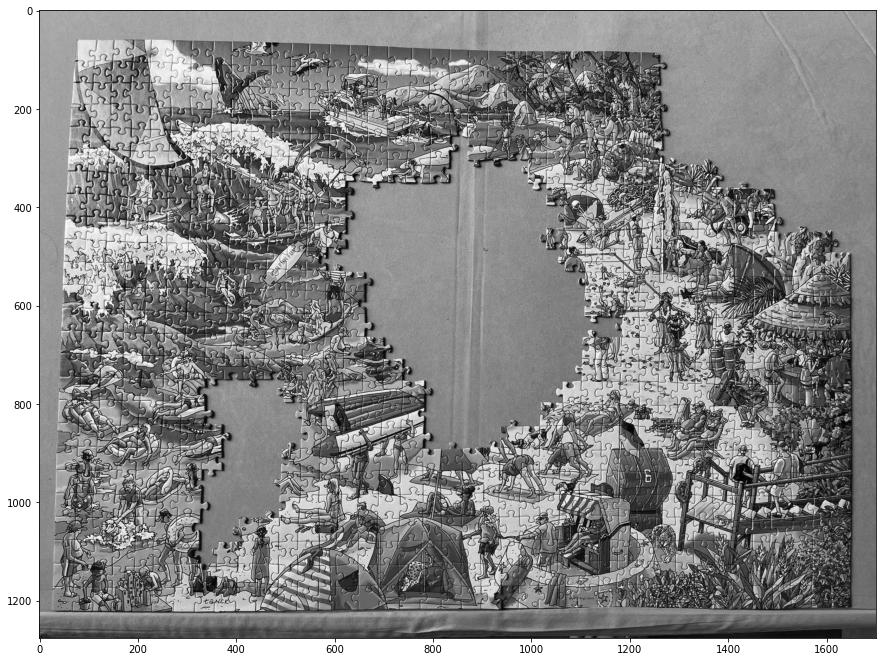

In [3]:
# Convert into GRAY scale for detecting the contours i.e. outline of each individual obejct
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gary_rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB) # TODO: why do we need to convert gray to RGB?

# Show the image
plt.figure(figsize=(15, 15))
plt.imshow(gary_rgb_img)
plt.show()


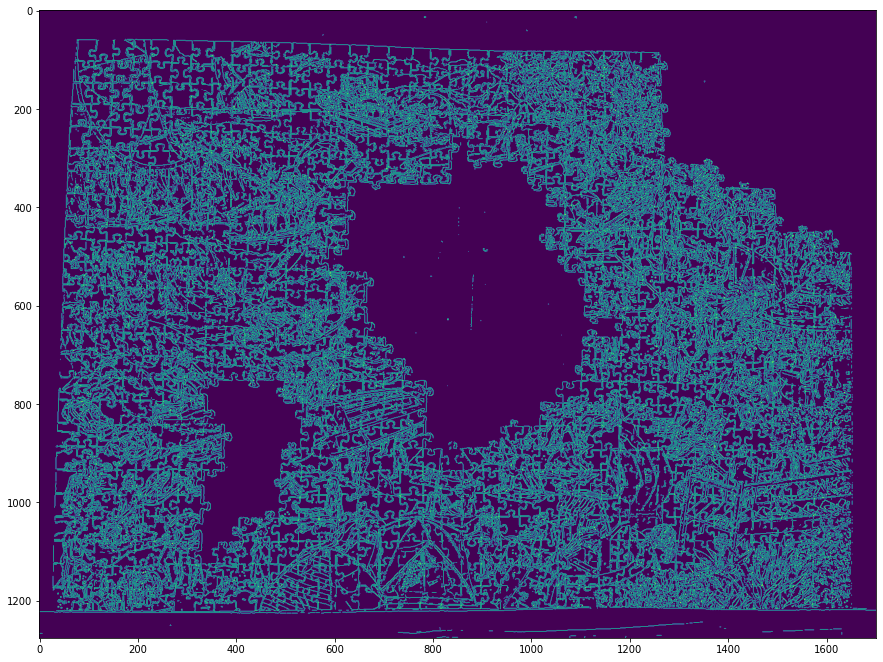

In [6]:
edges = cv2.Canny(gary_rgb_img, threshold1=190, threshold2=200, apertureSize=3, L2gradient=True)

# Show the image
plt.figure(figsize=(15, 15))
plt.imshow(edges)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


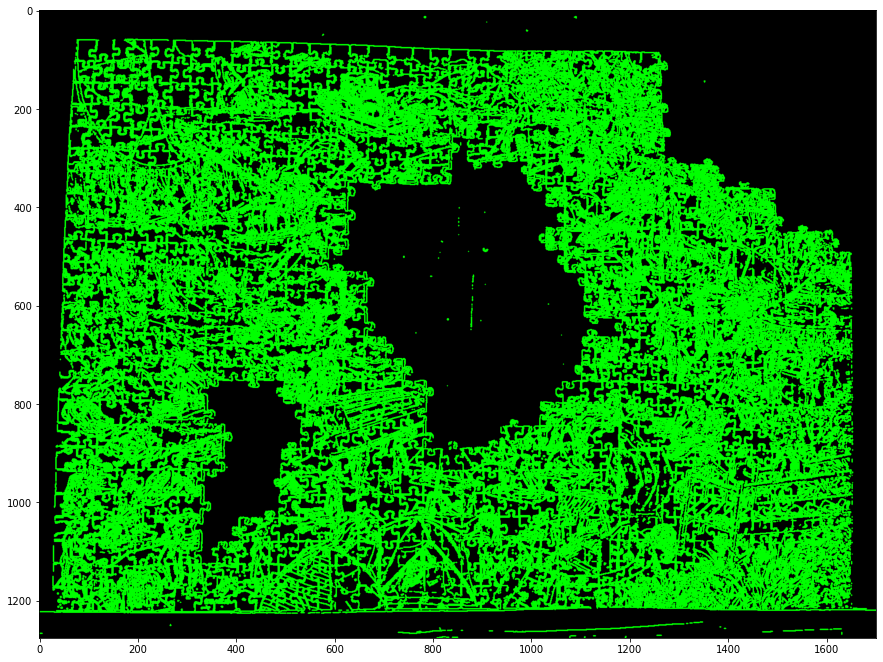

In [99]:
# find the total contours
conts = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# fine tune the contours return by cv2 using imutils(Because there are some contours openCV didn't catch)
conts = imutils.grab_contours(conts) # 

# Draw the contours in the empty image i.e. cont_img
cont_img = np.zeros(img.shape)
cont_img = cv2.drawContours(cont_img, conts, -1, (0, 255, 0), 2) # 2 is the thickness

# show the image only with the borders of contours
plt.figure(figsize=(15, 15))
plt.imshow(cont_img)
plt.show()

In [98]:
conts

(array([[[ 840, 1274]],
 
        [[ 851, 1274]]], dtype=int32),
 array([[[ 828, 1274]],
 
        [[ 833, 1274]]], dtype=int32),
 array([[[1109, 1273]],
 
        [[1109, 1275]],
 
        [[1109, 1274]],
 
        [[1110, 1273]]], dtype=int32),
 array([[[ 820, 1273]],
 
        [[ 819, 1274]],
 
        [[ 815, 1274]],
 
        [[ 814, 1275]],
 
        [[ 809, 1275]],
 
        [[ 814, 1275]],
 
        [[ 815, 1274]],
 
        [[ 819, 1274]],
 
        [[ 820, 1273]],
 
        [[ 826, 1273]]], dtype=int32),
 array([[[1193, 1272]],
 
        [[1193, 1273]],
 
        [[1192, 1274]],
 
        [[1192, 1275]],
 
        [[1192, 1274]],
 
        [[1193, 1273]]], dtype=int32),
 array([[[1079, 1272]],
 
        [[1079, 1275]]], dtype=int32),
 array([[[1127, 1271]],
 
        [[1131, 1271]]], dtype=int32),
 array([[[1081, 1271]],
 
        [[1091, 1271]]], dtype=int32),
 array([[[1256, 1270]],
 
        [[1265, 1270]]], dtype=int32),
 array([[[   0, 1266]],
 
        [[   6, 1266]]], 

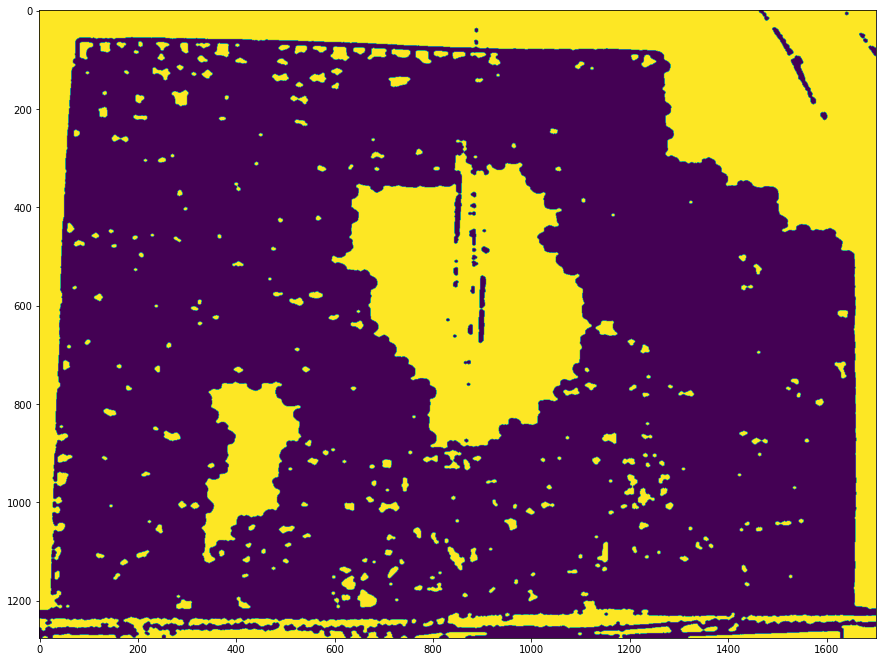

In [22]:
gary_rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB) # TODO: why do we need to convert gray to RGB?
edges = cv2.Canny(gary_rgb_img, threshold1=190, threshold2=200, apertureSize=3, L2gradient=True)

blur_img = cv2.GaussianBlur(gary_rgb_img, (7, 7), 2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur_img, cv2.MORPH_GRADIENT, kernel)
h, w = img.shape[:2]

lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)

foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
background = cv2.dilate(foreground, kernel, iterations=3)
unknown = cv2.subtract(background, foreground)

# show the image only with the borders of contours
plt.figure(figsize=(15, 15))
plt.imshow(foreground)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


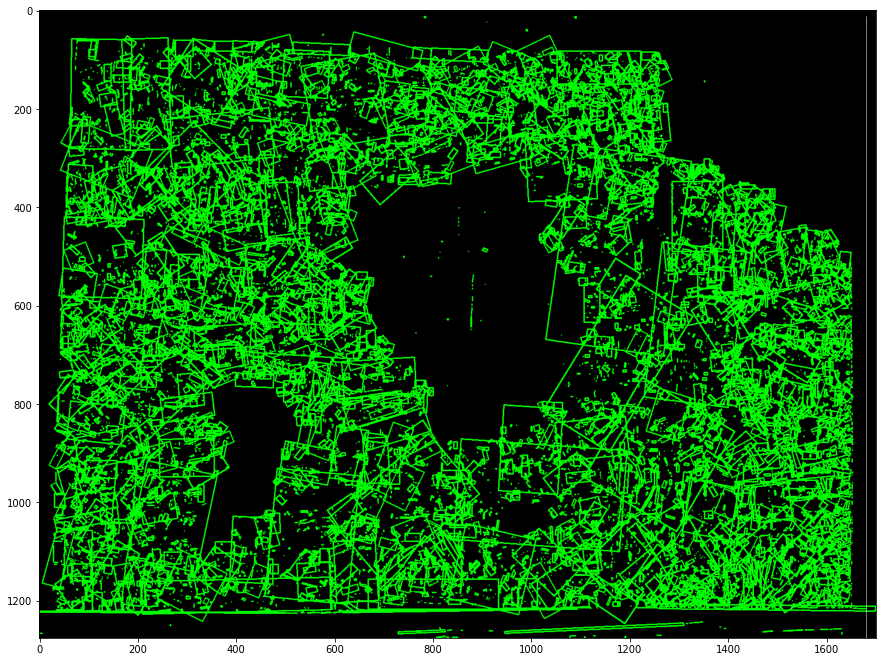

In [96]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_img, threshold1=190, threshold2=200, apertureSize=3, L2gradient=True)

blur_img = cv2.GaussianBlur(gray_img, (11, 11), 2)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# gradient = cv2.morphologyEx(gary_rgb_img, cv2.MORPH_GRADIENT, kernel)

edges = cv2.Canny(gray_img, threshold1=190, threshold2=200, apertureSize=3, L2gradient=True)

cont_img = np.zeros(img.shape)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(cont_img, contours, -1, (0, 255, 0), 2) # 2 is the thickness
a = []

for c in contours:
    # extract the bot points(left top, right bottom, accurancy)
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype='int')

    (tl, tr, br, bl) = box
    a.append(tl)

    # if cv2.contourArea(c) > 1000:
        # peri = cv2.arcLength(c, True)
        # approx = cv2.approxPolyDP(c, 0.02*peri, True)
    cv2.drawContours(cont_img, [box], -1, (0, 255, 0), 2) # 2 is the thickness
 
cv2.line(cont_img, (1682, 13), (1682, 1275), (255, 255, 255), 1)

# show the image only with the borders of contours
plt.figure(figsize=(15, 15))
plt.imshow(cont_img)
plt.show()

In [87]:
x = [i[0] for i in a]
y = [i[1] for i in a]

In [93]:
max(x), min(y), max(y)

(1682, 13, 1275)